## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

In [360]:
%matplotlib inline

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

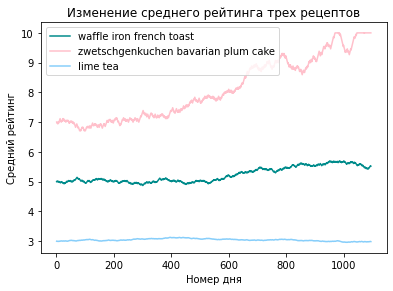

In [131]:
file = np.load('average_ratings.npy')
toast = file[0]
cake = file[1]
tea = file[2]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
days = list(range(1,len(file[0])+1))
toast_line = ax.plot(days, toast, 'darkcyan', label='waffle iron french toast')
cake_line = ax.plot(days, cake, 'pink', label='zwetschgenkuchen bavarian plum cake')
tea_line = ax.plot(days, tea, 'lightskyblue', label='lime tea')
ax.legend(handles=[toast_line[0], cake_line[0], tea_line[0]], loc='upper left')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title("Изменение среднего рейтинга трех рецептов");

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [132]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


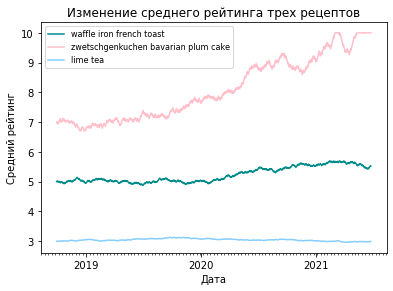

In [133]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
days = pd.date_range(start='1/1/2019', end='30/12/2021', inclusive='both')
toast_line = ax.plot(days, toast, 'darkcyan', label='waffle iron french toast')
cake_line = ax.plot(days, cake, 'pink', label='zwetschgenkuchen bavarian plum cake')
tea_line = ax.plot(days, tea, 'lightskyblue', label='lime tea')
ax.legend(handles=[toast_line[0], cake_line[0], tea_line[0]], loc='upper left', fontsize=8)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title("Изменение среднего рейтинга трех рецептов");

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


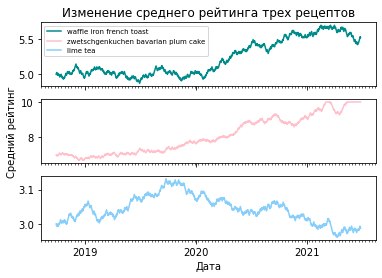

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex = 'col')
days = pd.date_range(start='1/1/2019', end='30/12/2021', inclusive='both')
k = 0 
for ax in axes:
    if k == 0:
        ax.set_title("Изменение среднего рейтинга трех рецептов")
        toast_line = ax.plot(days, toast, 'darkcyan', label='waffle iron french toast')
        ax.legend(handles=[toast_line[0], cake_line[0], tea_line[0]], loc='upper left', fontsize=7)
        k += 1
    elif k == 1:
        ax.set_ylabel('Средний рейтинг')
        cake_line = ax.plot(days, cake, 'pink', label='zwetschgenkuchen bavarian plum cake')
        k += 1
    else:
        ax.set_xlabel('Дата')
        tea_line = ax.plot(days, tea, 'lightskyblue', label='lime tea')
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12));

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


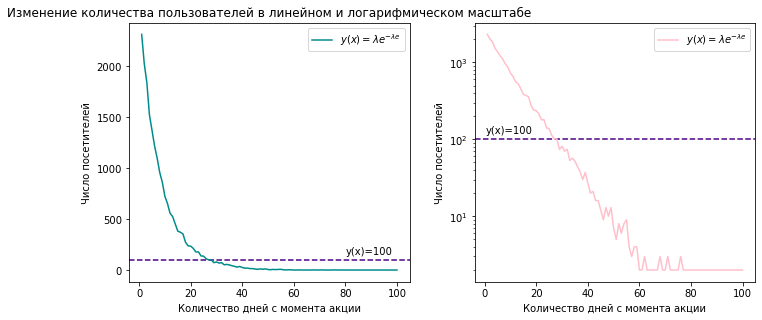

In [352]:
file = np.load('visitors.npy')
days = list(range(1,len(file)+1))
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.65, 0.9])
ax.set_title('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.text(80, 160,'y(x)=100',rotation=360)
plt.axhline(y=100, color='indigo', ls='--')
ax_log = fig.add_axes([0.9, 0.1, 0.65, 0.9])
plt.axhline(y=100, color='indigo', ls='--', label='y(x)=100')
plt.text(0.4, 120,'y(x)=100',rotation=360)
line = ax.plot(days, file, 'darkcyan', label='$y(x) = \lambda e^{-\lambda e}$')
line_log = ax_log.plot(days, file, 'pink', label='$y(x) = \lambda e^{-\lambda e}$')
ax_log.set_yscale("log")
ax.legend(handles=[line[0]], loc='upper right')
ax_log.legend(handles=[line_log[0]], loc='upper right')
ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel('Число посетителей')
ax_log.set_xlabel('Количество дней с момента акции')
ax_log.set_ylabel('Число посетителей');

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [257]:
reviews = pd.read_csv('reviews_visualization.csv', delimiter=',', index_col=0)
recipes = pd.read_csv('recipes_visualization.csv', delimiter=',')
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

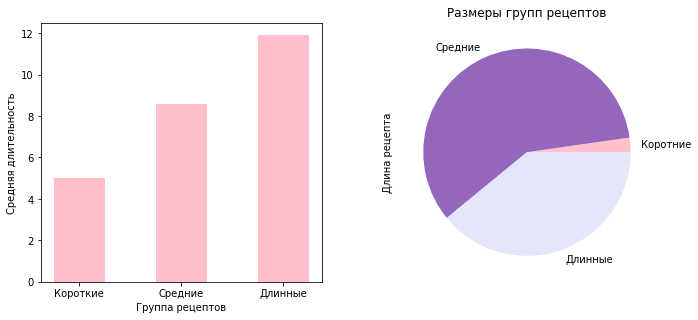

In [362]:
short = recipes[(recipes.minutes <5)]
middle = recipes[(recipes.minutes >= 5) & (recipes.minutes < 50)]
long = recipes[(recipes.minutes >= 50)]
y = (short.n_steps.mean(), middle.n_steps.mean(), long.n_steps.mean())
y = list(y)
x = ('Короткие', 'Средние', 'Длинные')
x = list(x)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.65, 0.9])
ax.bar(x, y, width = 0.5, color='pink')
ax.set_xlabel("Группа рецептов")
ax.set_ylabel("Средняя длительность")
ax_circle = fig.add_axes([0.9, 0.1, 0.65, 0.9])
data = {'Длина рецепта': [len(short), len(middle), len(long)]}
df = pd.DataFrame(data, index=['Коротние', 'Средние', 'Длинные'])
colors = ['pink', 'tab:purple', 'lavender']
df['Длина рецепта'].plot(kind='pie', colors=colors);
ax_circle.set_title("Размеры групп рецептов");

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

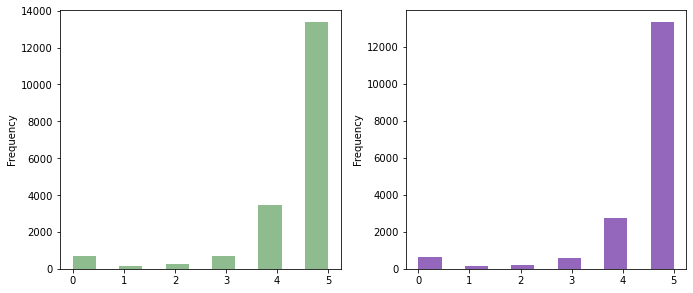

In [334]:
reviews_selected_2008 = reviews[(reviews.date >= '2008-01-01') & (reviews.date <'2009-01-01')]
reviews_selected_2009 = reviews[(reviews.date >= '2009-01-01') & (reviews.date <'2010-01-01')]
reviews_selected_2008_rating = reviews_selected_2008['rating']
reviews_selected_2009_rating = reviews_selected_2009['rating']
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.65, 0.9])
reviews_selected_2008_rating.plot.hist(bins=11, color='darkseagreen')
ax2 = fig.add_axes([0.9, 0.1, 0.65, 0.9])
reviews_selected_2009_rating.plot.hist(bins=11, color='tab:purple');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [369]:
def f(row):
    if row['minutes'] < 5:
        val = 'Короткий'
    elif row['minutes'] >= 5 and row['minutes'] < 50 :
        val = 'Средний'
    else :
        val = 'Длинный'
    return val

recipes_row = recipes
recipes_row['Длительность рецепта'] = recipes_row.apply(f, axis = 1)
recipes_row

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,Длительность рецепта
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средний
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,Длинный
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,Длинный
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,Длинный
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный


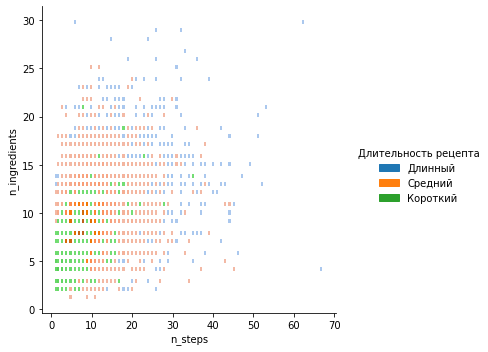

In [375]:
sns.displot(recipes, x="n_steps", y="n_ingredients", hue='Длительность рецепта');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

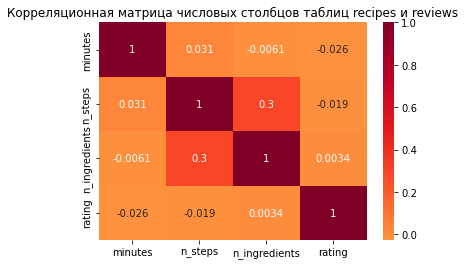

In [389]:
combined_table = recipes.merge(reviews, left_on='id', right_on='recipe_id', how='left')
combined_table = combined_table[['minutes', 'n_steps', 'n_ingredients', 'rating']]
dataplot=sns.heatmap(combined_table.corr(), cmap='YlOrRd', center=0.0, annot = True).set(title="Корреляционная матрица числовых столбцов таблиц recipes и reviews")